## **Theory Part 1 A.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import random as rand
import requests as req

In [ ]:
data = [[-2,1],
     [-5,-4],
     [-3,1],
     [0,3],
     [-6,11],
     [-2,5],
     [1,0],
     [5,-1],
     [-1,-3],
     [3,1]]
data = np.matrix(data)
n,m = data.shape

In [ ]:
stdx = data[:,0]
mean = np.mean(stdx, axis=0)
std = np.std(stdx, axis=0, ddof=1)
stdx = (stdx - mean)/std

In [ ]:
Y = data[:,1]
Y = np.matrix(Y)

In [ ]:
thetazero = np.ones((n, 1))

In [ ]:
XMat = np.hstack((thetazero, stdx))

In [ ]:
thetas = np.linalg.inv(XMat.T @ XMat) @ XMat.T @ Y

In [ ]:
line = np.matrix((thetas[1] * stdx[:,0].T) + thetas[0])
line = line.T

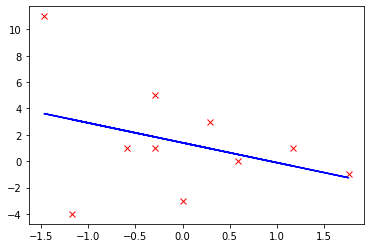

In [ ]:
plt.plot(stdx[:,0], data[:,1], 'rx')
plt.plot(stdx[:,0], line[:,0], 'b')
plt.plot
plt.show()

### **Theory Part 1 B.**

In [ ]:
reg = LinearRegression().fit(XMat, Y)
print(reg.coef_)
print(reg.intercept_)
print('--------')
print(thetas)

[[ 0.         -1.50355704]]
[1.4]
--------
[[ 1.4       ]
 [-1.50355704]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **[Theory Part 2](https://)**
1. Using the power rule: Derivative of (x-1)^4 is 4(x-1)^3
2. The value equals 0 at x=1 for the derivative we can tell it is the global minima because the slope of the derivative before 1 is negative and after is positive. Example: 4(0.9 - 1)^3 = -0.004 and 4(1.1-1)^3 = 0.004

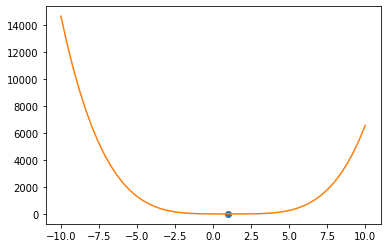

In [ ]:
polys = np.poly1d([1,-4,6,-4,1])

xrange = np.linspace(-10, 10)

new_y = polys(xrange)


plt.plot(1, 0, "o", xrange, new_y)

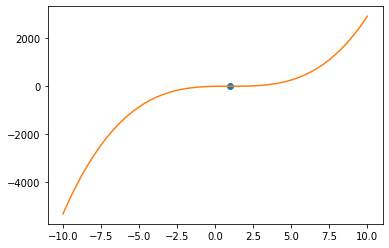

In [ ]:
gradpolys = np.poly1d([4,-12,12,-4])

gradnew_y = gradpolys(xrange)


plt.plot(1, 0, "o", xrange, gradnew_y)




### **Q2**





In [ ]:
url = 'https://raw.githubusercontent.com/gitparrot/MLHW1/main/x06Simple.csv'
csvdata = pd.read_csv(url, header=None, index_col=False)

In [ ]:
csvdata = csvdata.iloc[1:,1:]

In [ ]:
csvdata = csvdata.sample(frac=1, random_state=0)
csvdata = csvdata.to_numpy()
csvdata = csvdata.astype(np.integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
m, n = csvdata.shape

In [ ]:
trainrows = int((2/3)*m)
testrows = m - trainrows

In [ ]:
testdata = csvdata[(trainrows):, :2]
testY = csvdata[(trainrows):, 2:]

In [ ]:
traindata = csvdata[:trainrows, :2]
trainY = csvdata[:trainrows, 2:]

In [ ]:
mean = np.mean(traindata, axis=0)
std = np.std(traindata, axis=0, ddof=1)
stdtrain = (traindata - mean)/std
mean = np.mean(testdata, axis=0)
std = np.std(testdata, axis=0, ddof=1)
stdtest = (testdata - mean)/std

In [ ]:
thetazero = np.ones((trainrows, 1))

In [ ]:
XMat = np.hstack((thetazero, stdtrain))

In [ ]:
thetas = np.linalg.inv(XMat.T @ XMat) @ XMat.T @ trainY

In [ ]:
line = np.matrix((thetas[1] * stdtest[:,0].T) + (thetas[2] * stdtest[:,1]) + thetas[0])
line = line.T

In [ ]:
RMSE = np.sqrt((1/testrows)*(np.sum(np.square(line - testY))))
print('')
print('RMSE: ', RMSE)


RMSE:  926.9404349367073


In [ ]:
reg = LinearRegression().fit(XMat, trainY)
print(reg.coef_)
print(reg.intercept_)
print('--------')
print(thetas)

[[   0.         1036.63016523 -295.66859639]]
[3343.27586207]
--------
[[3343.27586207]
 [1036.63016523]
 [-295.66859639]]


### **Q3**

In [ ]:
SFX = csvdata[:,:2]
SFY = csvdata[:,2:]
LRMSE=[]

In [ ]:
for i in range(0,20):
  kf = KFold(n_splits=3, shuffle=True,random_state=i)
  for train_index, test_index in kf.split(SFX):
    x_train, x_test = SFX[train_index], SFX[test_index]
    y_train, ytest = SFY[train_index], SFY[test_index]

    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0, ddof=1)
    stdtrain = (x_train - mean)/std
    mean = np.mean(x_test, axis=0)
    std = np.std(x_test, axis=0, ddof=1)
    stdtest = (x_test - mean)/std

    thetazero = np.ones((len(stdtrain), 1))

    XMat = np.hstack((thetazero, stdtrain))

    thetas = np.linalg.inv(XMat.T @ XMat) @ XMat.T @ y_train

    line = np.matrix((thetas[1] * stdtrain[:,0].T) + (thetas[2] * stdtrain[:,1]) + thetas[0])

    se = np.sum(np.square(line.T - y_train))

  RMSE = np.sqrt((1/len(y_train))*se)

  LRMSE.append(RMSE)

mean = np.mean(LRMSE, axis=0)
std = np.std(LRMSE, axis=0, ddof=1)

print('RMSE average:', mean)
print('RMSE std dev:', std)

LRMSE = []

RMSE average: 593.5946107737357
RMSE std dev: 39.64164826351596


In [ ]:
for i in range(0,20):
  kf = KFold(n_splits=5, shuffle=True,random_state=i)
  for train_index, test_index in kf.split(SFX):
    x_train, x_test = SFX[train_index], SFX[test_index]
    y_train, ytest = SFY[train_index], SFY[test_index]

    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0, ddof=1)
    stdtrain = (x_train - mean)/std
    mean = np.mean(x_test, axis=0)
    std = np.std(x_test, axis=0, ddof=1)
    stdtest = (x_test - mean)/std

    thetazero = np.ones((len(stdtrain), 1))

    XMat = np.hstack((thetazero, stdtrain))

    thetas = np.linalg.inv(XMat.T @ XMat) @ XMat.T @ y_train

    line = np.matrix((thetas[1] * stdtrain[:,0].T) + (thetas[2] * stdtrain[:,1]) + thetas[0])

    se = np.sum(np.square(line.T - y_train))

  RMSE = np.sqrt((1/len(y_train))*se)

  LRMSE.append(RMSE)

mean = np.mean(LRMSE, axis=0)
std = np.std(LRMSE, axis=0, ddof=1)

print('RMSE average:', mean)
print('RMSE std dev:', std)

LRMSE = []

RMSE average: 588.9301257901046
RMSE std dev: 21.49974146176737


In [ ]:
for i in range(0,20):
  kf = KFold(n_splits=20, shuffle=True,random_state=i)
  for train_index, test_index in kf.split(SFX):
    x_train, x_test = SFX[train_index], SFX[test_index]
    y_train, ytest = SFY[train_index], SFY[test_index]

    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0, ddof=1)
    stdtrain = (x_train - mean)/std
    mean = np.mean(x_test, axis=0)
    std = np.std(x_test, axis=0, ddof=1)
    stdtest = (x_test - mean)/std

    thetazero = np.ones((len(stdtrain), 1))

    XMat = np.hstack((thetazero, stdtrain))

    thetas = np.linalg.inv(XMat.T @ XMat) @ XMat.T @ y_train

    line = np.matrix((thetas[1] * stdtrain[:,0].T) + (thetas[2] * stdtrain[:,1]) + thetas[0])

    se = np.sum(np.square(line.T - y_train))

  RMSE = np.sqrt((1/len(y_train))*se)

  LRMSE.append(RMSE)

mean = np.mean(LRMSE, axis=0)
std = np.std(LRMSE, axis=0, ddof=1)

print('RMSE average:', mean)
print('RMSE std dev:', std)

LRMSE = []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


RMSE average: 579.4643384710268
RMSE std dev: 13.325454286593644


In [ ]:
for i in range(0,20):
  kf = KFold(n_splits=len(SFX), shuffle=True,random_state=i)
  for train_index, test_index in kf.split(SFX):
    x_train, x_test = SFX[train_index], SFX[test_index]
    y_train, ytest = SFY[train_index], SFY[test_index]

    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0, ddof=1)
    stdtrain = (x_train - mean)/std
    mean = np.mean(x_test, axis=0)
    std = np.std(x_test, axis=0, ddof=1)
    stdtest = (x_test - mean)/std

    thetazero = np.ones((len(stdtrain), 1))

    XMat = np.hstack((thetazero, stdtrain))

    thetas = np.linalg.inv(XMat.T @ XMat) @ XMat.T @ y_train

    line = np.matrix((thetas[1] * stdtrain[:,0].T) + (thetas[2] * stdtrain[:,1]) + thetas[0])

    se = np.sum(np.square(line.T - y_train))

  RMSE = np.sqrt((1/len(y_train))*se)

  LRMSE.append(RMSE)

mean = np.mean(LRMSE, axis=0)
std = np.std(LRMSE, axis=0, ddof=1)

print('RMSE average:', mean)
print('RMSE std dev:', std)

LRMSE = []


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


RMSE average: 579.8908534476157
RMSE std dev: 7.183936357478547


### **Q4**

In [ ]:
url = 'https://raw.githubusercontent.com/gitparrot/MLHW1/main/x06Simple.csv'
csvdata = pd.read_csv(url, header=None, index_col=False)

In [ ]:
csvdata = csvdata.iloc[1:,1:]

In [ ]:
csvdata = csvdata.sample(frac=1, random_state=0)
csvdata = csvdata.to_numpy()
csvdata = csvdata.astype(np.integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
m, n = csvdata.shape

In [ ]:
trainrows = int((2/3)*m)
testrows = m - trainrows

In [ ]:
testdata = csvdata[(trainrows):, :2]
testY = csvdata[(trainrows):, 2:]
traindata = csvdata[:trainrows, :2]
trainY = csvdata[:trainrows, 2:]

In [ ]:
mean = np.mean(traindata, axis=0)
std = np.std(traindata, axis=0, ddof=1)
stdtrain = (traindata - mean)/std
mean = np.mean(testdata, axis=0)
std = np.std(testdata, axis=0, ddof=1)
stdtest = (testdata - mean)/std

In [ ]:
thetazero = np.ones((trainrows, 1))

In [ ]:
XMat = np.hstack((thetazero, stdtrain))

In [ ]:
distance = np.ones((trainrows, 1))
sqer = np.ones((testrows, 1))

In [ ]:
for i in range(0,testrows):
  for j in range(0,trainrows):
    distance[j][0] = np.power(2.71828, np.abs((stdtest[i][0] - stdtrain[j][0])) + np.abs((stdtest[i][1] - stdtrain[j][0])))
  W = np.diagflat(distance)
  thetas = np.linalg.inv(XMat.T @ W @ XMat) @ XMat.T @ W @ trainY
  prediction = (thetas[1] * stdtest[i,0].T) + (thetas[2] * stdtest[i,1]) + thetas[0]
  sqer[i][0] = np.square((prediction - testY[i]))


In [ ]:
RMSE = np.sqrt((1/testrows)*np.sum(sqer))
print('RSME: ',RMSE)

RSME:  1407.4886558168937


### **Q5**

In [ ]:
url = 'https://raw.githubusercontent.com/gitparrot/MLHW1/main/x06Simple.csv'
csvdata = pd.read_csv(url, header=None, index_col=False)
csvdata = csvdata.iloc[1:,1:]
csvdata = csvdata.sample(frac=1, random_state=0)
csvdata = csvdata.to_numpy()
csvdata = csvdata.astype(np.integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  


In [ ]:
m, n = csvdata.shape

In [ ]:
trainrows = int((1/3)*m)
testrows = m - trainrows

In [ ]:
testdata = csvdata[range(trainrows, testrows), :2]
testY = csvdata[range(trainrows, testrows), 2:]
traindata = csvdata[:trainrows, :2]
trainY = csvdata[:trainrows, 2:]
vdata = csvdata[testrows:, :2]
vY = csvdata[testrows:, 2:]
vdata

array([[ 69,  29],
       [ 28,  27],
       [ 14,  31],
       [ 41,  29],
       [ 97,  25],
       [ 28,  29],
       [ 55,  31],
       [153,  27],
       [125,  27],
       [139,  25],
       [ 97,  31],
       [139,  31],
       [ 55,  25],
       [ 14,  25]])

In [ ]:
mean = np.mean(traindata, axis=0)
std = np.std(traindata, axis=0, ddof=1)
stdtrain = (traindata - mean)/std
mean = np.mean(testdata, axis=0)
std = np.std(testdata, axis=0, ddof=1)
stdtest = (testdata - mean)/std
mean = np.mean(vdata, axis=0)
std = np.std(vdata, axis=0, ddof=1)
stdv = (vdata - mean)/std

In [ ]:
thetazero = np.ones((trainrows, 1))
XMat = np.hstack((thetazero, stdtrain))
thetazero_test = np.ones((len(testY), 1))
XMat_test = np.hstack((thetazero_test, stdtest))
thetazero_v = np.ones((len(vY), 1))
XMat_v = np.hstack((thetazero_v, stdv))
np.shape(XMat)

(14, 3)

In [ ]:
def RMSEF(y, y_hat):
  return np.sqrt(np.sum((y - y_hat) ** 2) / len(y))

def accuracy(hyp, targety):
  m = np.shape(hyp)
  count = 0
  for i in range(0, m[0]):
    #count accuracy for all right predictions compared with test
    if hyp[i] == targety[i]:
      count += 1
  acc = count / m[0]
  return acc

In [ ]:
m, n = np.shape(XMat)
learningrate = 0.01
iterations = 1000
np.random.seed(0)
thetas = np.random.uniform(low=-1, high=1, size=(n,1))
rmse_training = []
rmse_testing = []
iter_list = []
v_list = []

for i in range(iterations):
  y_hat = np.dot(XMat, thetas)
  vy_hat = np.dot(XMat_v, thetas)
  loss =  y_hat - trainY
  gradient = 2 * XMat.T.dot(loss)
  thetas = thetas - (learningrate/m) * gradient
  rmse_value = RMSEF(trainY, y_hat)
  rmse_testing.append(RMSEF(testY, np.dot(XMat_test, thetas)))
  rmse_training.append(rmse_value)
  rmsev = RMSEF(vY, np.dot(XMat_v, thetas))
  v_list.append(rmsev)
  iter_list.append(i)
  if i > 2 and v_list[-1] > v_list[-2]:
    print(i)
    break
  if i != 0 and rmse_training[i-1] - rmse_value < 2 ** -23:
    print(i)
    break


87


In [ ]:
def performance(y, yhat):
  n = len(y)
  perc = np.abs(y - yhat) / n
  percmean = np.mean(perc)
  print(percmean)

In [ ]:
performance(testY, np.dot(XMat_test, thetas))

43.642572128526176


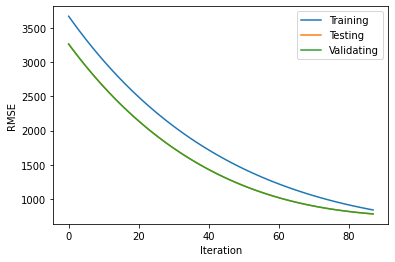

In [ ]:
plt.plot(iter_list, rmse_training, label="Training")
plt.plot(iter_list, rmse_testing, label="Testing")
plt.plot(iter_list, rmse_testing, label="Validating")
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
print(f"RMSE is {RMSEF(testY, np.dot(XMat_test, thetas))}")

RMSE is 777.6884654567041
